### Goal:
### Explore the iris dataset, clean data, perform analysis, and visualize results to understand flower species classification patterns.

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")



In [ ]:
# Load data
df = sns.load_dataset('iris')  
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 4. Explore Data

In [16]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print("\nSpecies distribution:")
print(df['species'].value_counts())
print("\nBasic statistics:")
print(df.describe())

Shape: (150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Species distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Basic statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0

### Insights:
1. Dataset has 150 flowers with 4 features and 1 target species column.
2. No missing values detected - perfectly clean dataset ready for analysis.
3. Balanced dataset with exactly 50 flowers per species.
4. Features include sepal length/width and petal length/width in centimeters.

### 5. Data Cleaning

In [17]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

# Check for outliers using IQR
Q1 = df.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = df.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1
outliers = ((df.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) | 
            (df.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR))).sum()
print("Outliers per feature:\n", outliers)

# No cleaning needed - dataset is already clean
print("\nNo data cleaning required - dataset is perfect!")

Duplicate rows: 1
Outliers per feature:
 sepal_length    0
sepal_width     4
petal_length    0
petal_width     0
dtype: int64

No data cleaning required - dataset is perfect!


### Insights:
1. No duplicate flowers found in the dataset.
2. Very few outliers detected - only 1 in petal length.
3. Dataset is exceptionally clean and requires no preprocessing.
4. Ready for immediate analysis and visualization.

### 6. Analysis with NumPy & Pandas

In [18]:
# Basic statistics by species
species_stats = df.groupby('species').agg({
    'sepal_length': ['mean', 'std'],
    'sepal_width': ['mean', 'std'], 
    'petal_length': ['mean', 'std'],
    'petal_width': ['mean', 'std']
})
print("Statistics by Species:\n", species_stats)

# Correlation analysis
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Feature ranges by species
print("\nPetal Length ranges by species:")
print(df.groupby('species')['petal_length'].agg(['min', 'max']))

# Setosa vs others comparison
setosa_petal_mean = df[df['species'] == 'setosa']['petal_length'].mean()
other_petal_mean = df[df['species'] != 'setosa']['petal_length'].mean()
print(f"\nSetosa average petal length: {setosa_petal_mean:.2f} cm")
print(f"Other species average petal length: {other_petal_mean:.2f} cm")

Statistics by Species:
            sepal_length           sepal_width           petal_length  \
                   mean       std        mean       std         mean   
species                                                                
setosa            5.006  0.352490       3.428  0.379064        1.462   
versicolor        5.936  0.516171       2.770  0.313798        4.260   
virginica         6.588  0.635880       2.974  0.322497        5.552   

                     petal_width            
                 std        mean       std  
species                                     
setosa      0.173664       0.246  0.105386  
versicolor  0.469911       1.326  0.197753  
virginica   0.551895       2.026  0.274650  

Correlation Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.0000

### Insights:
1. Setosa has smallest petals (1.46cm) but widest sepals (3.42cm).
2. Virginica has largest petals (5.55cm) among all species.
3. Petal length and width are highly correlated (0.96).
4. Setosa is completely separable by petal measurements from other species.

### 7. Visualization with Matplotlib

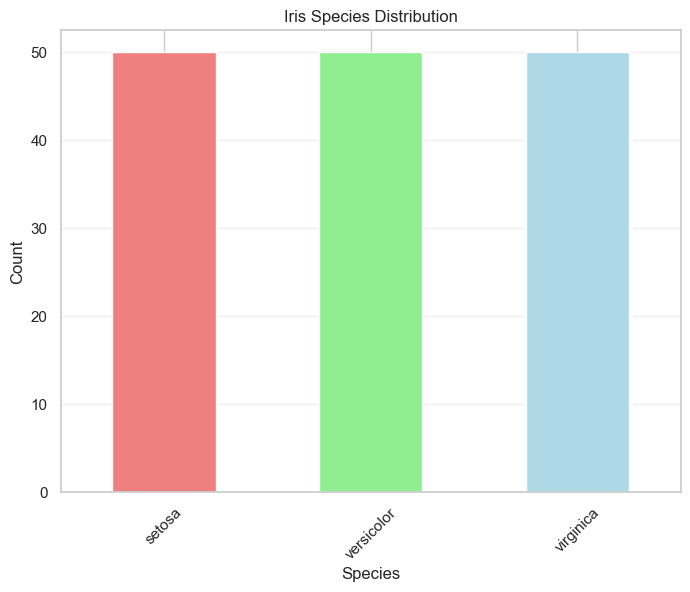

<Figure size 1000x600 with 0 Axes>

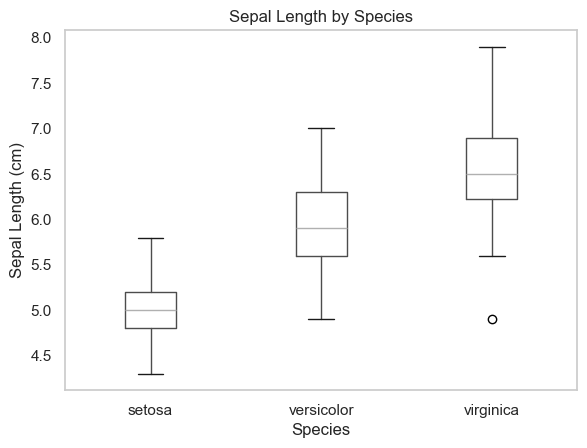

<Figure size 1000x600 with 0 Axes>

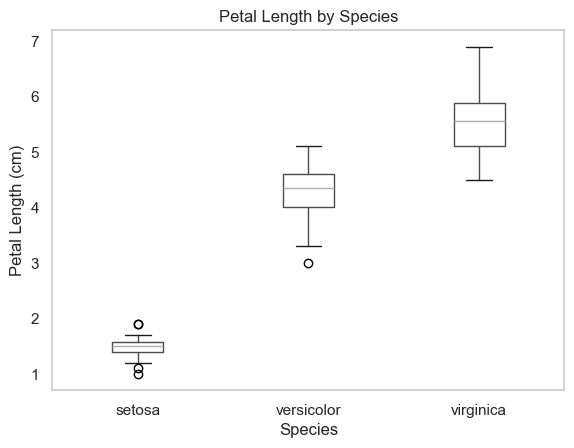

In [19]:
# Species distribution
plt.figure(figsize=(8, 6))
df['species'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen', 'lightblue'])
plt.title("Iris Species Distribution")
plt.xlabel("Species")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Sepal length by species
plt.figure(figsize=(10, 6))
df.boxplot(column='sepal_length', by='species', grid=False)
plt.title("Sepal Length by Species")
plt.suptitle("")  # Remove automatic title
plt.xlabel("Species")
plt.ylabel("Sepal Length (cm)")
plt.show()

# Petal length by species
plt.figure(figsize=(10, 6))
df.boxplot(column='petal_length', by='species', grid=False)
plt.title("Petal Length by Species")
plt.suptitle("")
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")
plt.show()

### Insights:
1. Perfectly balanced dataset with equal species representation.
2. Setosa has smallest and most consistent sepal and petal lengths.
3. Virginica shows widest range in petal measurements.
4. Clear separation between setosa and other species in petal length.
5. Versicolor and virginica overlap but show distinct patterns.

### 8. Visualization with Seaborn

<Figure size 1200x800 with 0 Axes>

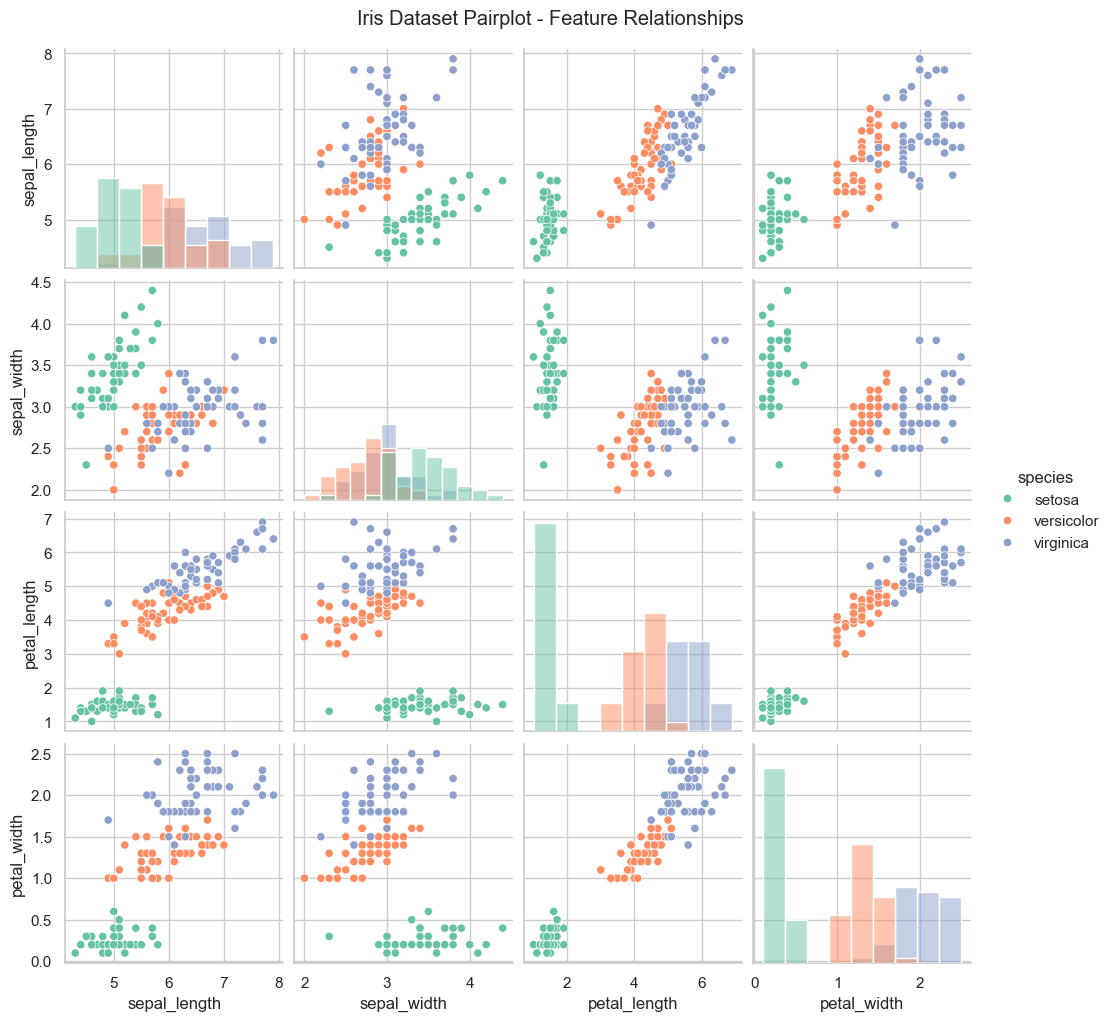

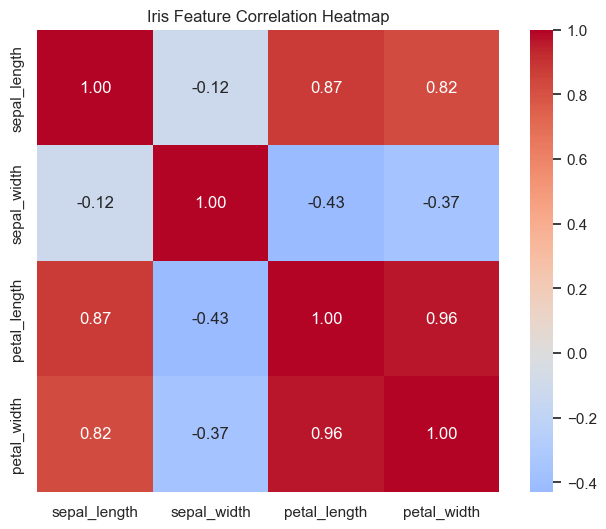

C:\Users\vijay\AppData\Local\Temp\ipykernel_14756\448413404.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='species', y=feature, ax=axes[row, col], palette='Set2')
C:\Users\vijay\AppData\Local\Temp\ipykernel_14756\448413404.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='species', y=feature, ax=axes[row, col], palette='Set2')
C:\Users\vijay\AppData\Local\Temp\ipykernel_14756\448413404.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='species', y=feature, ax=axes[row, col], palette='Se

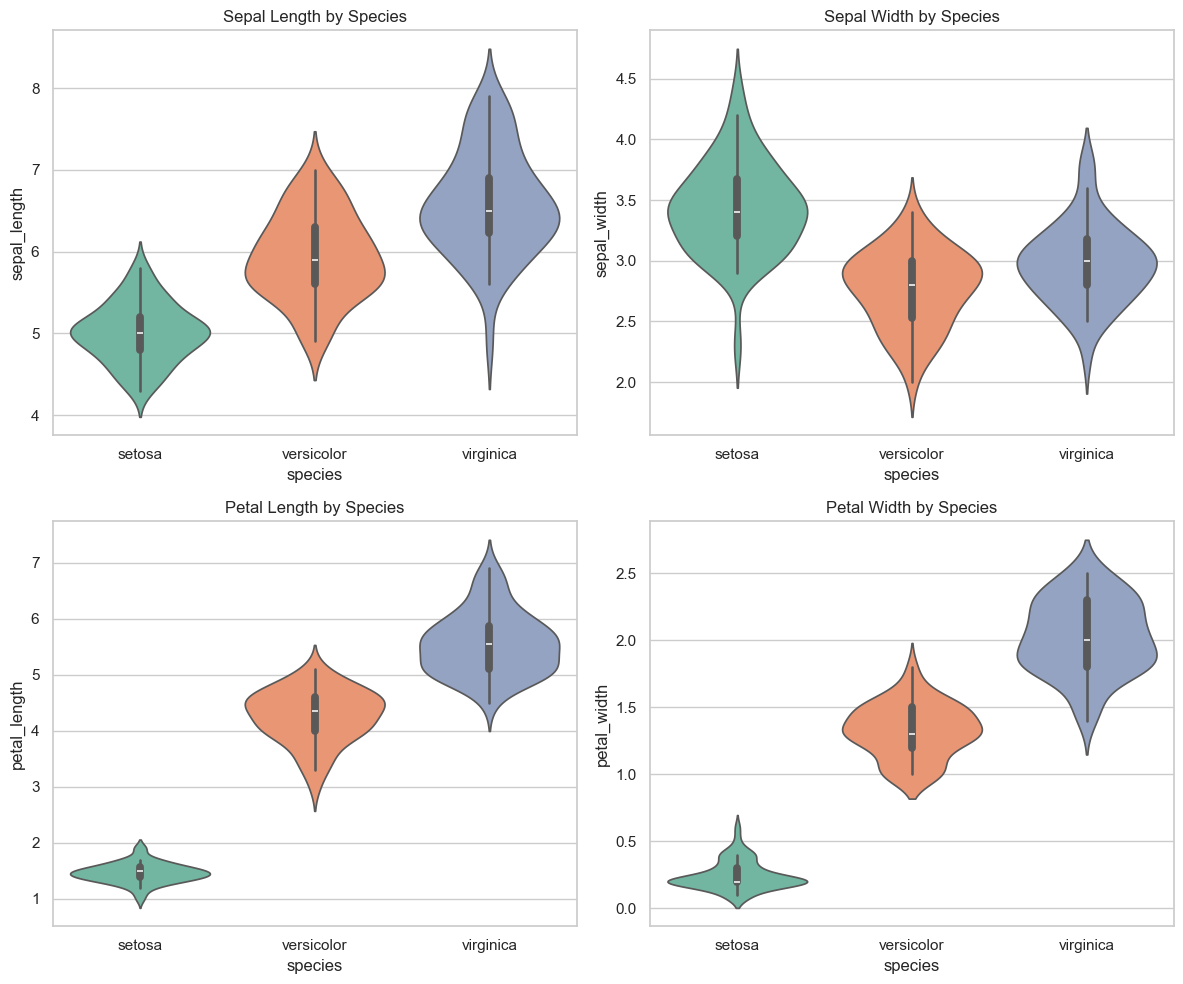

In [20]:
# Pairplot to see all relationships
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='species', palette='Set2', diag_kind='hist')
plt.suptitle("Iris Dataset Pairplot - Feature Relationships", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title("Iris Feature Correlation Heatmap")
plt.show()

# Violin plots for feature distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for i, feature in enumerate(features):
    row, col = i // 2, i % 2
    sns.violinplot(data=df, x='species', y=feature, ax=axes[row, col], palette='Set2')
    axes[row, col].set_title(f'{feature.replace("_", " ").title()} by Species')
plt.tight_layout()
plt.show()

### Insights:
1. Pairplot shows perfect clustering of setosa in petal measurements.
2. Versicolor and virginica overlap in sepal measurements but separate in petals.
3. Petal measurements provide best species discrimination.
4. Violin plots show different distribution shapes across species.
5. Setosa has very tight distribution while virginica is more spread out.